# Data analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

## Balanced dataset (4000 reviews)

In [16]:
# load dataset
df = pd.read_excel("./dataset_balanced_4000.xlsx")
pd.set_option('display.max_colwidth', None)
df.head()

,ID,review,label,new_label
0,1,Not able to add freinds. It show something went wrong.. Recommend not to install it,bug report,0
1,2,Calls keep dropping for no reason and is super annoying,bug report,0
2,3,Can't access to my account solve this issue immediately,bug report,0
3,4,"I don't know what's wrong with my own WhatsApp. Its not working. And if I want to sign up, it will just be bringing try again later. You guys should see to it.",bug report,0
4,5,Cannot record audio while taking video,bug report,0


In [17]:
# number of review in each class
print(df['label'].value_counts())

bug report         1000
feature request    1000
rating             1000
user experience    1000
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

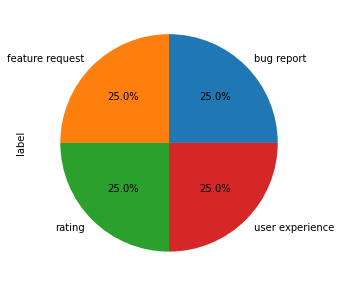

In [21]:
df['label'].value_counts().plot(kind ='pie',figsize=(5,5),autopct='%1.1f%%')

array([[<AxesSubplot:title={'center':'WORD_COUNT'}>]], dtype=object)

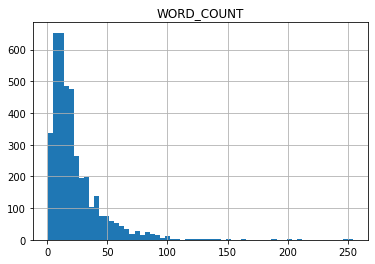

In [22]:
df['WORD_COUNT'] = df['review'].apply(lambda x: len(x.split()))
df.hist('WORD_COUNT', bins=60)

In [23]:
# get text data column
text_data = df['review'].tolist()
text_lengths = [len(str(text).strip()) for text in text_data]
avg_length = sum(text_lengths) / len(text_lengths)

# Compute the median of the text
sorted_lengths = sorted(text_lengths)
n = len(sorted_lengths)
if n % 2 == 0:
    median = (sorted_lengths[n//2-1] + sorted_lengths[n//2]) / 2
else:
    median = sorted_lengths[n//2]

# Calculate the mode of the text
counts = Counter(text_lengths)
mode = counts.most_common(1)[0][0]

print("Average text length: {:.2f}".format(avg_length))
print("Median text length: {}".format(median))
print("Mode text length: {}".format(mode))

Average text length: 121.94
Median text length: 87.0
Mode text length: 57


## Unbalanced dataset (4000 reviews)

In [40]:
# load dataset
df = pd.read_excel("./dataset_unbalanced_4000.xlsx")
pd.set_option('display.max_colwidth', None)
df

,ID,review,label,new_label
0,1,Not able to add freinds. It show something went wrong.. Recommend not to install it,bug report,0
1,2,Calls keep dropping for no reason and is super annoying,bug report,0
2,3,Can't access to my account solve this issue immediately,bug report,0
3,4,"I don't know what's wrong with my own WhatsApp. Its not working. And if I want to sign up, it will just be bringing try again later. You guys should see to it.",bug report,0
4,5,Cannot record audio while taking video,bug report,0
...,...,...,...,...
3995,3996,"good app, l will give you 5 star!",rating,2
3996,3997,Never had a problem with it.,rating,2
3997,3998,It s great and I recommend it all the time to others.,rating,2
3998,3999,"Everyone can use this app ,",rating,2


In [41]:
# number of review in each class
print(df['label'].value_counts())

feature request    1410
bug report         1257
rating              740
user experience     593
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

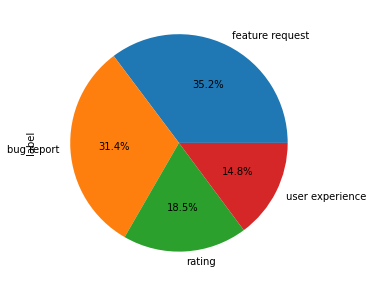

In [42]:
df['label'].value_counts().plot(kind ='pie',figsize=(5,5),autopct='%1.1f%%')

array([[<AxesSubplot:title={'center':'WORD_COUNT'}>]], dtype=object)

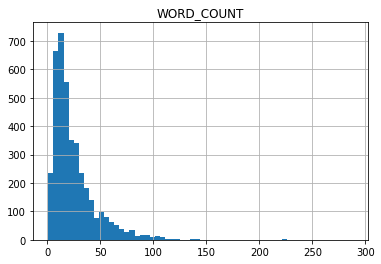

In [43]:
df['WORD_COUNT'] = df['review'].apply(lambda x: len(x.split()))
df.hist('WORD_COUNT', bins=60)

In [44]:
# get text data column
text_data = df['review'].tolist()
text_lengths = [len(str(text).strip()) for text in text_data]
avg_length = sum(text_lengths) / len(text_lengths)

# Compute the median of the text
sorted_lengths = sorted(text_lengths)
n = len(sorted_lengths)
if n % 2 == 0:
    median = (sorted_lengths[n//2-1] + sorted_lengths[n//2]) / 2
else:
    median = sorted_lengths[n//2]

# Calculate the mode of the text
counts = Counter(text_lengths)
mode = counts.most_common(1)[0][0]

print("Average text length: {:.2f}".format(avg_length))
print("Median text length: {}".format(median))
print("Mode text length: {}".format(mode))

Average text length: 129.67
Median text length: 96.0
Mode text length: 54


## Balanced dataset after data augmentation (8000 reviews)

In [35]:
# load dataset
df = pd.read_excel("./dataset_balanced_8000.xlsx")
pd.set_option('display.max_colwidth', None)
df

,ID,review,label,new_label
0,1,Not able to add freinds. It show something went wrong.. Recommend not to install it,bug report,0
1,2,Calls keep dropping for no reason and is super annoying,bug report,0
2,3,Can't access to my account solve this issue immediately,bug report,0
3,4,"I don't know what's wrong with my own WhatsApp. Its not working. And if I want to sign up, it will just be bringing try again later. You guys should see to it.",bug report,0
4,5,Cannot record audio while taking video,bug report,0
...,...,...,...,...
7995,7996,"good app, l will give you 5 star!",rating,2
7996,7997,Never had a problem with it.,rating,2
7997,7998,It s great and I recommend it all the time to others.,rating,2
7998,7999,"Everyone can use this app ,",rating,2


In [36]:
# number of review in each class
print(df['label'].value_counts())

bug report         2000
feature request    2000
rating             2000
user experience    2000
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

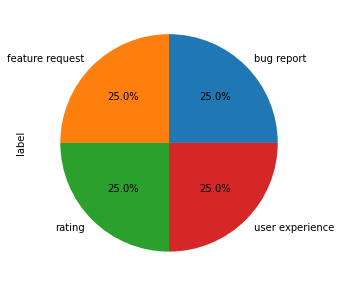

In [37]:
df['label'].value_counts().plot(kind ='pie',figsize=(5,5),autopct='%1.1f%%')

array([[<AxesSubplot:title={'center':'WORD_COUNT'}>]], dtype=object)

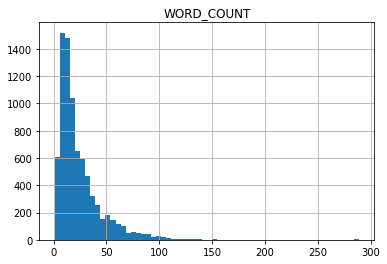

In [38]:
df['WORD_COUNT'] = df['review'].apply(lambda x: len(x.split()))
df.hist('WORD_COUNT', bins=60)

In [39]:
# get text data column
text_data = df['review'].tolist()
text_lengths = [len(str(text).strip()) for text in text_data]
avg_length = sum(text_lengths) / len(text_lengths)

# Compute the median of the text
sorted_lengths = sorted(text_lengths)
n = len(sorted_lengths)
if n % 2 == 0:
    median = (sorted_lengths[n//2-1] + sorted_lengths[n//2]) / 2
else:
    median = sorted_lengths[n//2]

# Calculate the mode of the text
counts = Counter(text_lengths)
mode = counts.most_common(1)[0][0]

print("Average text length: {:.2f}".format(avg_length))
print("Median text length: {}".format(median))
print("Mode text length: {}".format(mode))

Average text length: 125.58
Median text length: 90.0
Mode text length: 53
